### Séries Temporais - Forecast

> Checkpoint FIAP 2021

Desafio:

Foi fornecido para você mais novo cientista de dados da empresa de vendas online "Venda Bem" uma base de dados com o historico de vendas do ultimo ano da empresa, e seu desafio é realizar uma previsao por meio de algum modelo de serie temporal para todo o proximo mes de vendas, salvar o resultado obtido em um csv e encaminhar ao professor. 

Boa Sorte!!

<br>
<hr>
Dados fornecidos:

> Data: Data do dia da venda

> X: ID da linha

> mes:	Mes referencia
 
> weekday: Dia da semana

> margem: Margem de lucro do dia

> venda: Valor total de venda no dia

> desconto:	Desconto total do dia

> outdesc: Outlier de desconto

> outmg: Outlier de margem de lucro

<br>
<hr>

In [ ]:
#!pip install prophet==1.0
!pip install prophet
!git clone https://github.com/diogenesjusto/FIAP.git

fatal: destination path 'FIAP' already exists and is not an empty directory.


In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import pickle

import warnings
warnings.filterwarnings("ignore")

from fbprophet import Prophet
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 

In [ ]:
# leitura dos dados 
df = pd.read_csv("/content/FIAP/Graduação/2021/S1/1_Checkpoint/baba.csv",  index_col='date', parse_dates=True)
df.drop(["Unnamed: 0"], axis=1, inplace=True)
df.head()

,X,mes,weekday,margem,venda,desconto,outdesc,outmg
date,,,,,,,,
2014-08-01,1,agosto,sexta-feira,0.406111,110042.460,9190.907534,0,0
2014-08-02,2,agosto,sabado,0.416022,58377.320,5713.043012,0,0
2014-08-03,3,agosto,domingo,0.431993,64635.390,8621.708915,0,0
2014-08-04,4,agosto,segunda-feira,0.409216,140417.321,18312.965640,0,0
2014-08-05,5,agosto,terca-feira,0.449648,149700.286,19942.741300,0,0


In [ ]:
# colunas e linhas 
df.shape

(396, 8)

In [ ]:
df.head()

,X,mes,weekday,margem,venda,desconto,outdesc,outmg
date,,,,,,,,
2014-08-01,1,agosto,sexta-feira,0.406111,110042.460,9190.907534,0,0
2014-08-02,2,agosto,sabado,0.416022,58377.320,5713.043012,0,0
2014-08-03,3,agosto,domingo,0.431993,64635.390,8621.708915,0,0
2014-08-04,4,agosto,segunda-feira,0.409216,140417.321,18312.965640,0,0
2014-08-05,5,agosto,terca-feira,0.449648,149700.286,19942.741300,0,0


<hr>


### Modelo teste 


teste com modelo se séries temporais da biblioteca facebook prophet, testamos o modelo com apenas a váriavel de data e seu target (univariada)


<br>

In [ ]:
# resetar linhas
df_prophet = df.reset_index()

In [ ]:
# excluir nulos 
df_prophet.dropna(inplace=True)

In [ ]:
# processamento do dataframe
df_prophet = df_prophet.loc[0:364]
df_prophet = df_prophet[["date", "venda"]]
df_prophet.rename(columns={"date":"ds", "venda":"y"}, inplace=True)
df_prophet["ds"] = pd.to_datetime(df_prophet["ds"])
df_prophet["y"] = np.log(df_prophet['y'])

In [ ]:
# selecionando colunas
df_prophet.columns = ["ds", "y"]

In [ ]:
# verificação de nulos
df_prophet.isnull().sum()

ds       0
marge    0
y        0
dtype: int64

In [ ]:
# criação do modelo com sasonalidade diária
model = Prophet(daily_seasonality='auto')
model.fit(df_prophet)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
# dataframe com predições
future = model.make_future_dataframe(periods=31, freq='D')
future.tail()

,ds
391,2015-08-27
392,2015-08-28
393,2015-08-29
394,2015-08-30
395,2015-08-31


In [ ]:
# predict do modelo
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
391,2015-08-27,10.709013,10.320974,11.107703
392,2015-08-28,10.653302,10.286743,11.054332
393,2015-08-29,10.210128,9.817235,10.593388
394,2015-08-30,10.350257,9.962320,10.736158
395,2015-08-31,10.936041,10.574503,11.350593


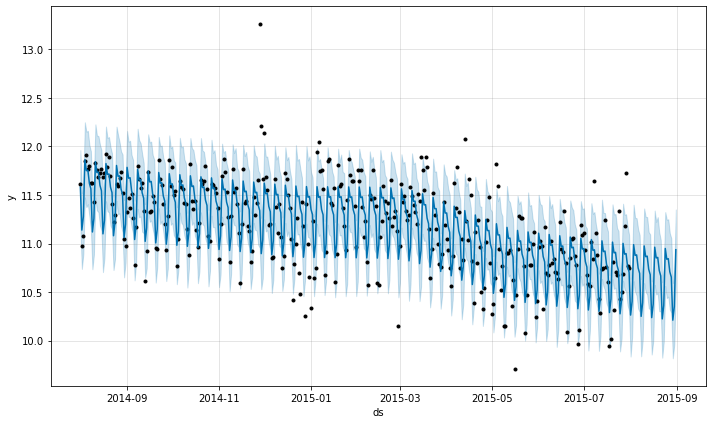

In [ ]:
# visualização da série predita 
fig1 = model.plot(forecast)

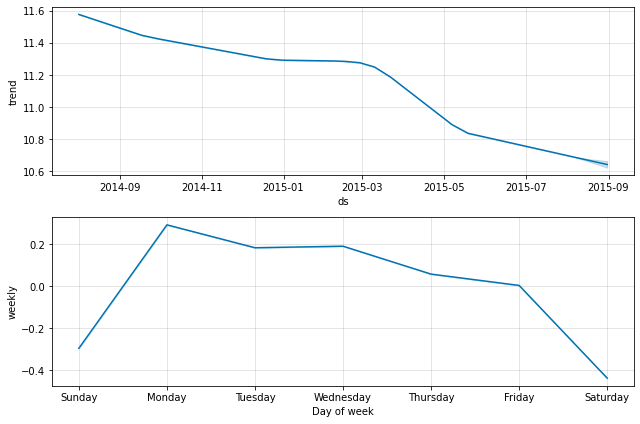

In [ ]:
# visualizando propriedades da série(tendência e sansozalidade semanal)
fig2 = model.plot_components(forecast)

In [ ]:
# selecionando y predito
forecast.set_index('ds')['yhat']

ds
2014-08-01    11.582491
2014-08-02    11.138410
2014-08-03    11.277633
2014-08-04    11.862511
2014-08-05    11.750789
                ...    
2015-08-27    10.709013
2015-08-28    10.653302
2015-08-29    10.210128
2015-08-30    10.350257
2015-08-31    10.936041
Name: yhat, Length: 396, dtype: float64

In [ ]:
# yhat
metric_df = forecast.set_index('ds')[['yhat']].join(df_prophet.set_index('ds').y).reset_index()

In [ ]:
metric_df

,ds,yhat,y
0,2014-08-01,11.582491,11.608622
1,2014-08-02,11.138410,10.974683
2,2014-08-03,11.277633,11.076517
3,2014-08-04,11.862511,11.852374
4,2014-08-05,11.750789,11.916390
...,...,...,...
391,2015-08-27,10.709013,NaN
392,2015-08-28,10.653302,NaN
393,2015-08-29,10.210128,NaN
394,2015-08-30,10.350257,NaN


In [ ]:
metric_df.dropna(inplace=True)

In [ ]:
# r2 do modelo
r2_score(metric_df.y, metric_df.yhat)

0.5936175841236107

In [ ]:
# MSE do modelo
mean_squared_error(metric_df.y, metric_df.yhat)

0.09121280634962303

In [ ]:
# RMSE do modelo
np.sqrt(mean_squared_error(metric_df.y, metric_df.yhat))

0.3020145796971117

In [ ]:
# salvando o modelo em pickle
filename = 'forecast_test.pkl'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
len(forecast['yhat'])

396

In [ ]:
# dataframe com medidas da série
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-08-01,11.577881,11.176446,11.962332,11.577881,11.577881,0.004610,0.004610,0.004610,0.004610,0.004610,0.004610,0.0,0.0,0.0,11.582491
1,2014-08-02,11.575105,10.738128,11.516182,11.575105,11.575105,-0.436695,-0.436695,-0.436695,-0.436695,-0.436695,-0.436695,0.0,0.0,0.0,11.138410
2,2014-08-03,11.572329,10.893594,11.643819,11.572329,11.572329,-0.294696,-0.294696,-0.294696,-0.294696,-0.294696,-0.294696,0.0,0.0,0.0,11.277633
3,2014-08-04,11.569553,11.475000,12.249410,11.569553,11.569553,0.292958,0.292958,0.292958,0.292958,0.292958,0.292958,0.0,0.0,0.0,11.862511
4,2014-08-05,11.566777,11.373905,12.152258,11.566777,11.566777,0.184012,0.184012,0.184012,0.184012,0.184012,0.184012,0.0,0.0,0.0,11.750789


In [ ]:
len(forecast[365:])

31

In [ ]:
forecast['yhat'][365:]

365    10.262475
366    10.402604
367    10.988389
368    10.877573
369    10.883050
370    10.748274
371    10.692562
372    10.249388
373    10.389518
374    10.975302
375    10.864487
376    10.869964
377    10.735187
378    10.679475
379    10.236301
380    10.376431
381    10.962215
382    10.851400
383    10.856877
384    10.722100
385    10.666388
386    10.223214
387    10.363344
388    10.949128
389    10.838313
390    10.843790
391    10.709013
392    10.653302
393    10.210128
394    10.350257
395    10.936041
Name: yhat, dtype: float64

In [ ]:
# criando lista das predições
lista_preditos = list(forecast[365:]['yhat'])
lista_id = [i for i in range(1, 32)]

In [ ]:
len(lista_preditos)

31

In [ ]:
# dataframe de IDs e previsões
df_predicao = pd.DataFrame(columns={'id':lista_id , 'predicao':lista_preditos})

In [ ]:
# criação do dataframe
df_predicao = pd.DataFrame()
df_predicao['id'] = df['X'][0:31]
df_predicao['predicao'] = lista_preditos

In [ ]:
df_predicao.head()

,id,predicao
date,,
2014-08-01,1,10.262475
2014-08-02,2,10.402604
2014-08-03,3,10.988389
2014-08-04,4,10.877573
2014-08-05,5,10.883050


In [ ]:
len(lista_preditos)

31

In [ ]:
df_predicao.dtypes

id            int64
predicao    float64
dtype: object

In [ ]:
# exportando CSV com predições 
df_predicao.to_csv('predicoes.csv', sep=';')

<br>
<hr>